In [1]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [2]:
%pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from fbprophet import Prophet

In [5]:
df=pd.read_csv("BTC-USD.csv")
df=df[["Date","Close"]]
df.columns=["ds","y"]
print(df)

             ds             y
0    2021-07-05  33746.003906
1    2021-07-06  34235.195313
2    2021-07-07  33855.328125
3    2021-07-08  32877.371094
4    2021-07-09  33798.011719
..          ...           ...
361  2022-07-01  19269.367188
362  2022-07-02  19242.255859
363  2022-07-03  19297.076172
364  2022-07-04  20231.261719
365  2022-07-05  19508.748047

[366 rows x 2 columns]


In [6]:
prophet=Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2021-07-05
1   2021-07-06
2   2021-07-07
3   2021-07-08
4   2021-07-09
..         ...
726 2023-07-01
727 2023-07-02
728 2023-07-03
729 2023-07-04
730 2023-07-05

[731 rows x 1 columns]


In [18]:
forecast=prophet.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-12-18,-24714.694236,-48382.002890,1687.829821
532,2022-12-19,-24969.614999,-49449.448279,1774.963446
533,2022-12-20,-25339.523546,-50172.681679,325.333983
534,2022-12-21,-25430.087271,-50664.853253,2025.557862
535,2022-12-22,-26067.944695,-51612.113377,2058.881838
...,...,...,...,...
726,2023-07-01,-76657.273164,-151850.464303,6764.734752
727,2023-07-02,-76761.091202,-155005.973590,5705.993813
728,2023-07-03,-77016.011965,-153042.838553,6401.100652
729,2023-07-04,-77385.920512,-155623.877634,7343.470936


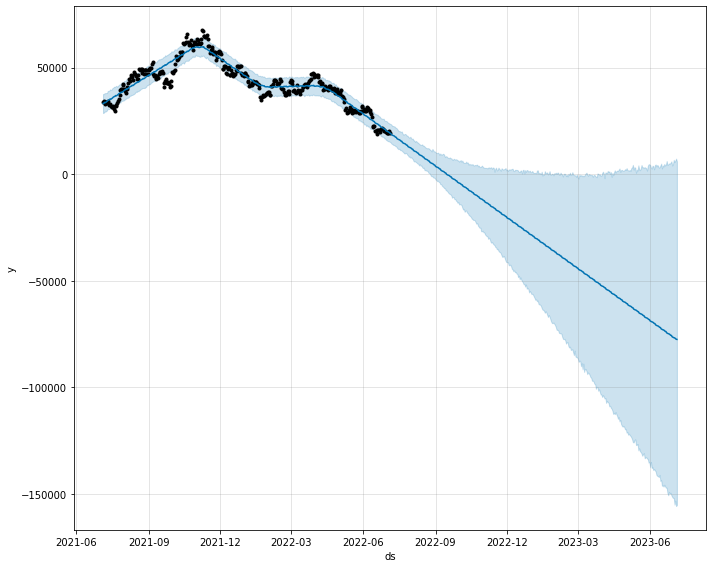

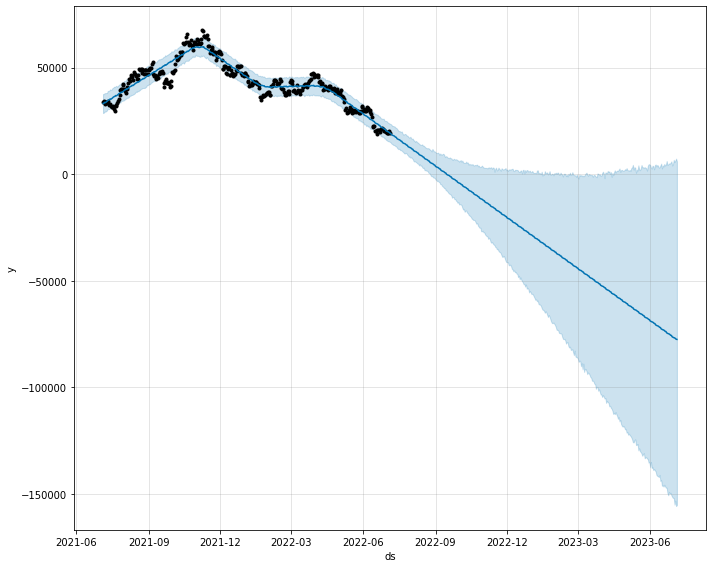

In [19]:
from fbprophet.plot import plot
prophet.plot(forecast,figsize=(10,8))